# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error,median_absolute_error
import time
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Abrir archivos

In [2]:
df = pd.read_csv("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Descarga Datos K\\Hourly Energy Consumption\\archiv\\AEP_hourly.csv")


df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.sort_values(by='Datetime',inplace = True)
df.reset_index(drop=True, inplace=True)

## Graficar datos

<function matplotlib.pyplot.show(close=None, block=None)>

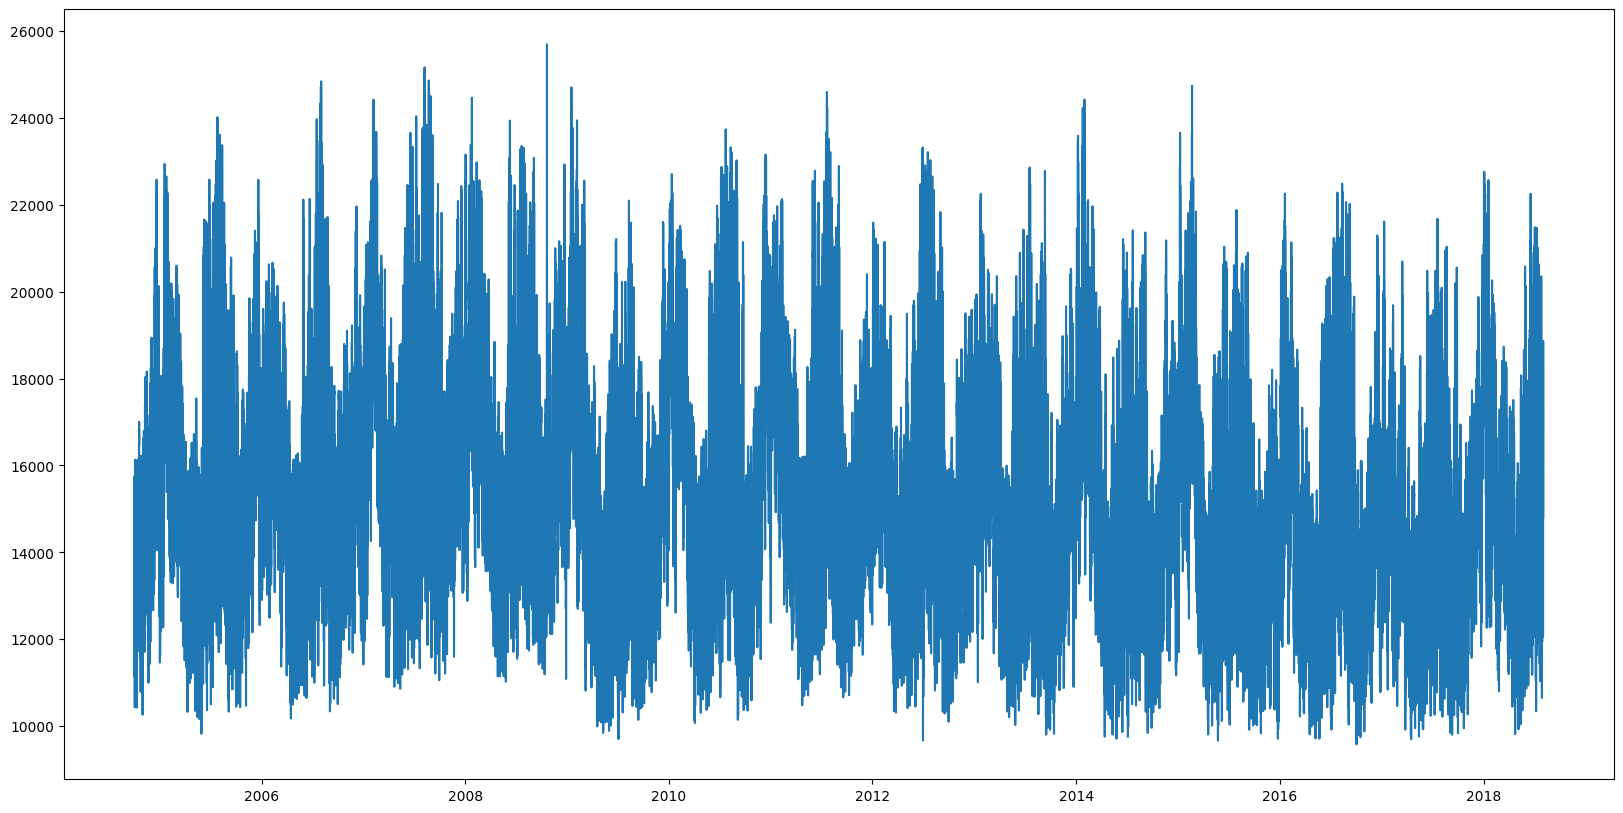

In [3]:
n = 69
n2 = 168*4
plt.figure(figsize=(20,10))
#sns.lineplot(data = df, x = "Datetime",y = "AEP_MW")
plt.plot(df['Datetime'][:], df['AEP_MW'][:])
plt.show

## Seleccionar datos para modelo

<function matplotlib.pyplot.show(close=None, block=None)>

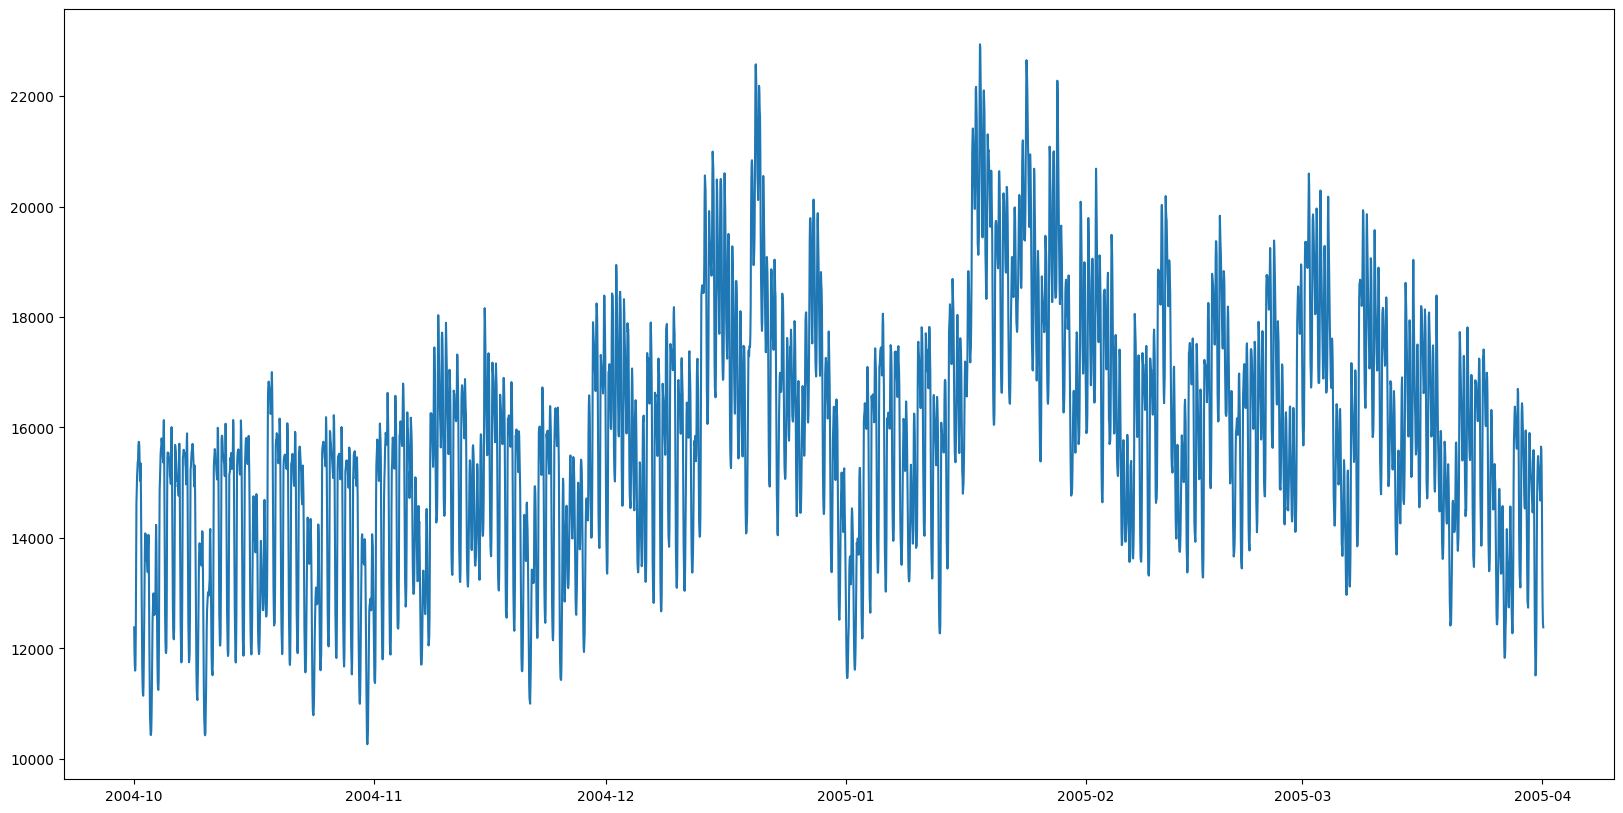

In [4]:
dfModelo = df.iloc[:4370,:]

plt.figure(figsize=(20,10))
plt.plot(dfModelo['Datetime'][:], dfModelo['AEP_MW'][:])
plt.show

# Definir Función

In [5]:
def LSTM_SIN_PD(df,nodos,activacion,epocas,ventana,n_pred):


    paciencia = 5
    epocas = 80
    batch  = 32



    datos = df['AEP_MW'].to_numpy()
    fechas = df['Datetime'].to_numpy()
    datos = datos.reshape(-1,1)

    estandarizacion = MinMaxScaler().fit(datos)
    scaled_data = estandarizacion.transform(datos)



    # dividir en train, test
    X, y = [], []
    Xf,yf = [],[]

    for i in range(len(scaled_data) - ventana - n_pred):
        X.append(scaled_data[i:i+ventana])
        y.append(scaled_data[i+ventana:i+ventana+n_pred])

        Xf.append(fechas[i:i+ventana])
        yf.append(fechas[i+ventana:i+ventana+n_pred])

    X, y = np.array(X), np.array(y)
    Xf,yf = np.array(Xf),np.array(yf)




    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
    fecha_X_train, fecha_X_test, fecha_y_train, fecha_y_test = train_test_split(Xf, yf, test_size=0.1, shuffle=False)



        
    model = Sequential()

    model.add(LSTM(nodos,activation= activacion, input_shape=(ventana,1)))
    model.add(Dense(nodos, activation=activacion))
    model.add(Dense(n_pred , activation=activacion))

    model.compile(optimizer="Adam", loss='mse')

    early_stopping = EarlyStopping(monitor='loss', patience=paciencia, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=epocas,validation_split = 0.2, verbose=1, batch_size=batch,shuffle = False, callbacks=[early_stopping])


    # guardar los archivo a usar en la carpeta 
    rutaAGuardar = f'Modelo {nodos} - nodos1 - {nodos} - nodos2 - {epocas} Epocas.keras'
    model.save(rutaAGuardar)




    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoca')
    plt.ylabel('Error')
    plt.legend()

    
    y_hat = model.predict(X_test, verbose=1)
    y_hat = estandarizacion.inverse_transform(y_hat)


In [6]:
datos = dfModelo['AEP_MW'].to_numpy()
fechas = dfModelo['Datetime'].to_numpy()
datos = datos.reshape(-1,1)

estandarizacion = MinMaxScaler().fit(datos)
scaled_data = estandarizacion.transform(datos)

window_size = 168
t_pridiccion = 24


# dividir en train, test
X, y = [], []
Xf,yf = [],[]

for i in range(len(scaled_data) - window_size - t_pridiccion):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size:i+window_size+t_pridiccion])

    Xf.append(fechas[i:i+window_size])
    yf.append(fechas[i+window_size:i+window_size+t_pridiccion])

X, y = np.array(X), np.array(y)
Xf,yf = np.array(Xf),np.array(yf)




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
fecha_X_train, fecha_X_test, fecha_y_train, fecha_y_test = train_test_split(Xf, yf, test_size=0.1, shuffle=False)

In [29]:
nodos1 = 50
nodos2 = 50
lr = 0.0001
paciencia = 5
epocas = 80
batch  = 32
window_size = 168
t_pridiccion = 24

model = Sequential()

model.add(LSTM(nodos1,activation= "tanh", input_shape=(window_size,1)))
model.add(Dense(nodos2, activation="relu"))
model.add(Dense(t_pridiccion , activation="linear"))

model.compile(optimizer="Adam", loss='mse')

early_stopping = EarlyStopping(monitor='loss', patience=paciencia, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=epocas,validation_split = 0.2, verbose=1, batch_size=batch,shuffle = False, callbacks=[early_stopping])



# guardar los archivo a usar en la carpeta 
rutaAGuardar = f'Modelo {nodos1} - nodos1 - {nodos2} - nodos2 - {epocas} Epocas.keras'
model.save(rutaAGuardar)




plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()


Epoch 1/80
Step 0, Loss: 0.0777, Norms: [0.020899946, 0.017496755, 0.07267895, 0.014709584, 0.06651586, 0.019713411, 0.10339979]


KeyboardInterrupt: 

In [24]:
history.history['loss'][-4:]

[0.005696323234587908,
 0.005638542119413614,
 0.005760478787124157,
 0.00569777749478817]

In [27]:
np.min(history.history['loss'])

0.005638542119413614

In [8]:

y_hat = model.predict(X_test, verbose=1)
y_hat = estandarizacion.inverse_transform(y_hat)


14/14 [==============================] - 2s 31ms/step


In [9]:
y_test1 = y_test.reshape(-1, 1)

y_test1 = estandarizacion.inverse_transform(y_test1)

y_test1 = y_test1.reshape(-1,24,1)


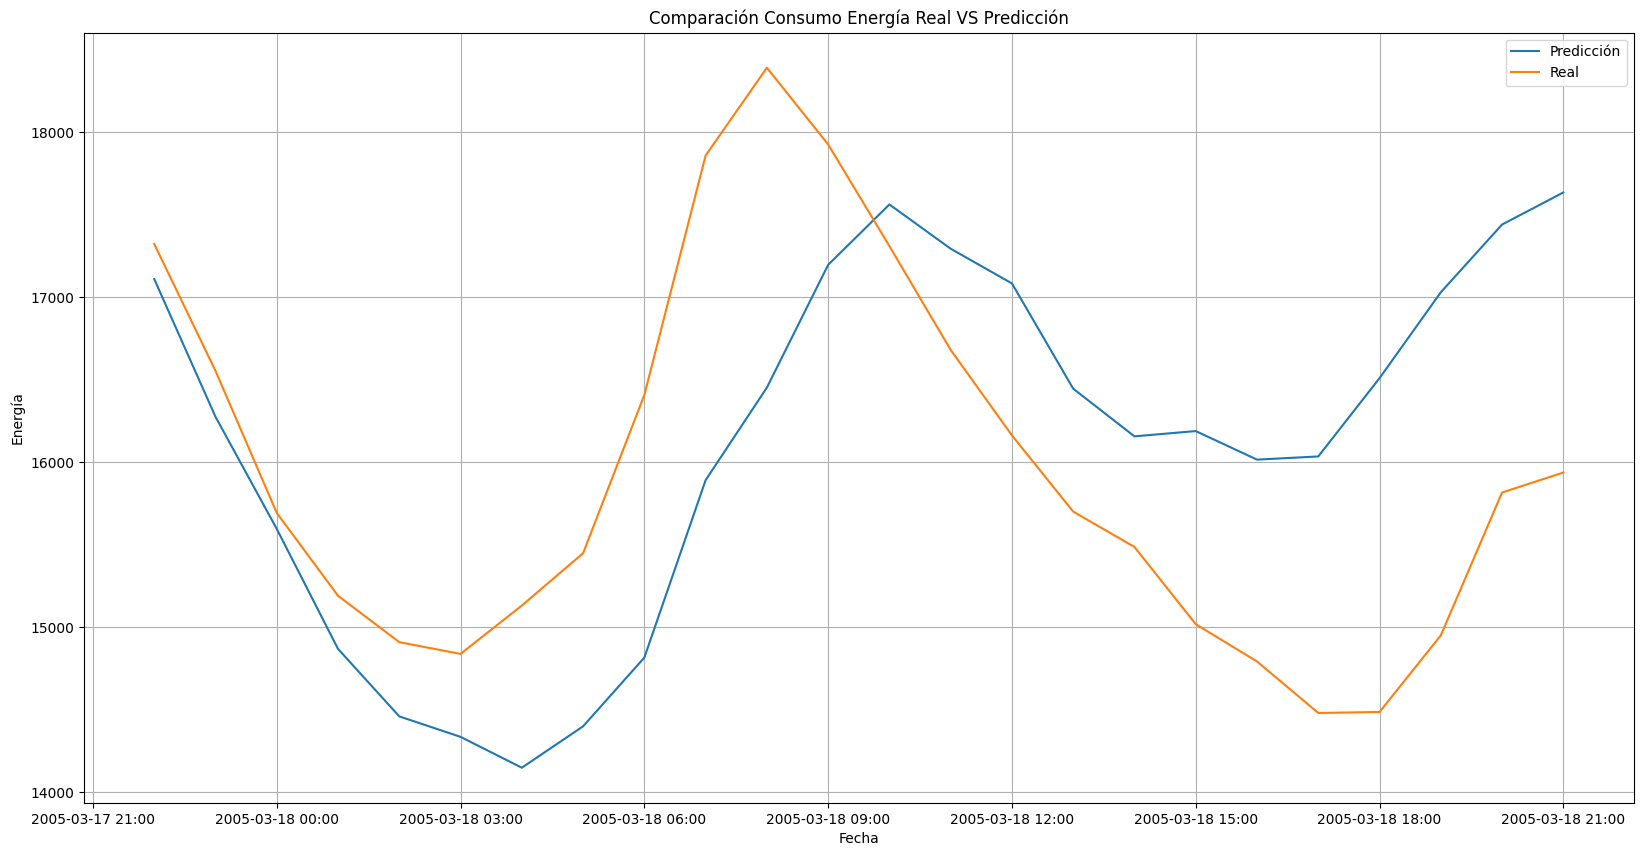

In [10]:

num = 100
plt.figure(figsize=(20,10))
plt.title("Comparación Consumo Energía Real VS Predicción")
#plt.plot(fecha_y_test[num], estandarizacion.inverse_transform(y_test[num]),label = "Real")
plt.plot(fecha_y_test[num],y_hat[num],label = "Predicción")
plt.plot(fecha_y_test[num],y_test1[num],label = "Real")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())



plt.ylabel("Energía")
plt.xlabel("Fecha")
plt.grid()
plt.legend()
plt.show()

# Encontrar métricas

In [11]:
predicciones24 = []
reales24 = []
for i in range(24):
        
    pred = []
    for Predicciones in y_hat:
        pred.append(Predicciones[i])
        
    real = []
    for reales in y_test1:
        real.append(reales[i])
        
    predicciones24.append(pred)
    reales24.append(real)
    



MAES = {}
RMSE = {}
ER_Medios = {}
ER_Medianos = {}
epsilon = 1e-10
for i in range(24):
    MAE = round(mean_absolute_error(predicciones24[i],reales24[i]),2)
    MSE = round(mean_squared_error(reales24[0],predicciones24[i]),2)
    Error_Relativo_Medio = round((np.mean(np.abs((np.array(reales24[i]) - np.array(predicciones24[i])) / (np.array(reales24[i])+epsilon)))*100),2)
    Error_Relativo_Mediano = round((np.median(np.abs((np.array(reales24[i]) - np.array(predicciones24[i])) / (np.array(reales24[i])+epsilon)))*100),2)
    
    
    MAES[i] = MAE
    RMSE[i] = np.sqrt(MSE)
    ER_Medianos[i] = Error_Relativo_Mediano
    ER_Medios[i] = Error_Relativo_Medio

In [12]:
MAES

{0: 257.09,
 1: 375.32,
 2: 451.55,
 3: 522.44,
 4: 557.7,
 5: 569.15,
 6: 581.5,
 7: 583.89,
 8: 617.36,
 9: 620.62,
 10: 681.44,
 11: 720.19,
 12: 760.03,
 13: 813.81,
 14: 792.91,
 15: 798.66,
 16: 839.12,
 17: 846.93,
 18: 825.47,
 19: 830.48,
 20: 838.7,
 21: 808.2,
 22: 834.88,
 23: 796.73}

In [13]:
RMSE

{0: 330.14563453118683,
 1: 530.6642347096703,
 2: 848.624828767106,
 3: 1232.195662222522,
 4: 1528.404197193923,
 5: 1689.6945049327703,
 6: 1794.467890490103,
 7: 1839.9867254955943,
 8: 1766.6264743855731,
 9: 1695.4795280391916,
 10: 1526.0242887975276,
 11: 1357.7050416051345,
 12: 1369.4070724222217,
 13: 1360.121068140627,
 14: 1523.0416803226365,
 15: 1694.7112851456438,
 16: 1801.4380255784542,
 17: 1916.6254224547893,
 18: 1866.324401062152,
 19: 1804.2710356262996,
 20: 1649.2024708931283,
 21: 1399.2285124310467,
 22: 1103.4099238270426,
 23: 775.2856634815324}

In [14]:
ER_Medianos

{0: 9.7,
 1: 9.61,
 2: 9.6,
 3: 9.73,
 4: 9.94,
 5: 9.95,
 6: 10.02,
 7: 9.96,
 8: 9.77,
 9: 9.88,
 10: 9.61,
 11: 9.49,
 12: 9.47,
 13: 9.23,
 14: 9.18,
 15: 9.26,
 16: 9.2,
 17: 9.36,
 18: 9.22,
 19: 9.37,
 20: 9.41,
 21: 9.49,
 22: 9.57,
 23: 9.46}

In [15]:
ER_Medios

{0: 11.5,
 1: 11.43,
 2: 11.44,
 3: 11.61,
 4: 11.83,
 5: 11.81,
 6: 11.87,
 7: 11.85,
 8: 11.65,
 9: 11.79,
 10: 11.55,
 11: 11.46,
 12: 11.52,
 13: 11.22,
 14: 11.14,
 15: 11.25,
 16: 11.3,
 17: 11.49,
 18: 11.33,
 19: 11.48,
 20: 11.52,
 21: 11.58,
 22: 11.72,
 23: 11.53}

# Imprimir todas las predicciones

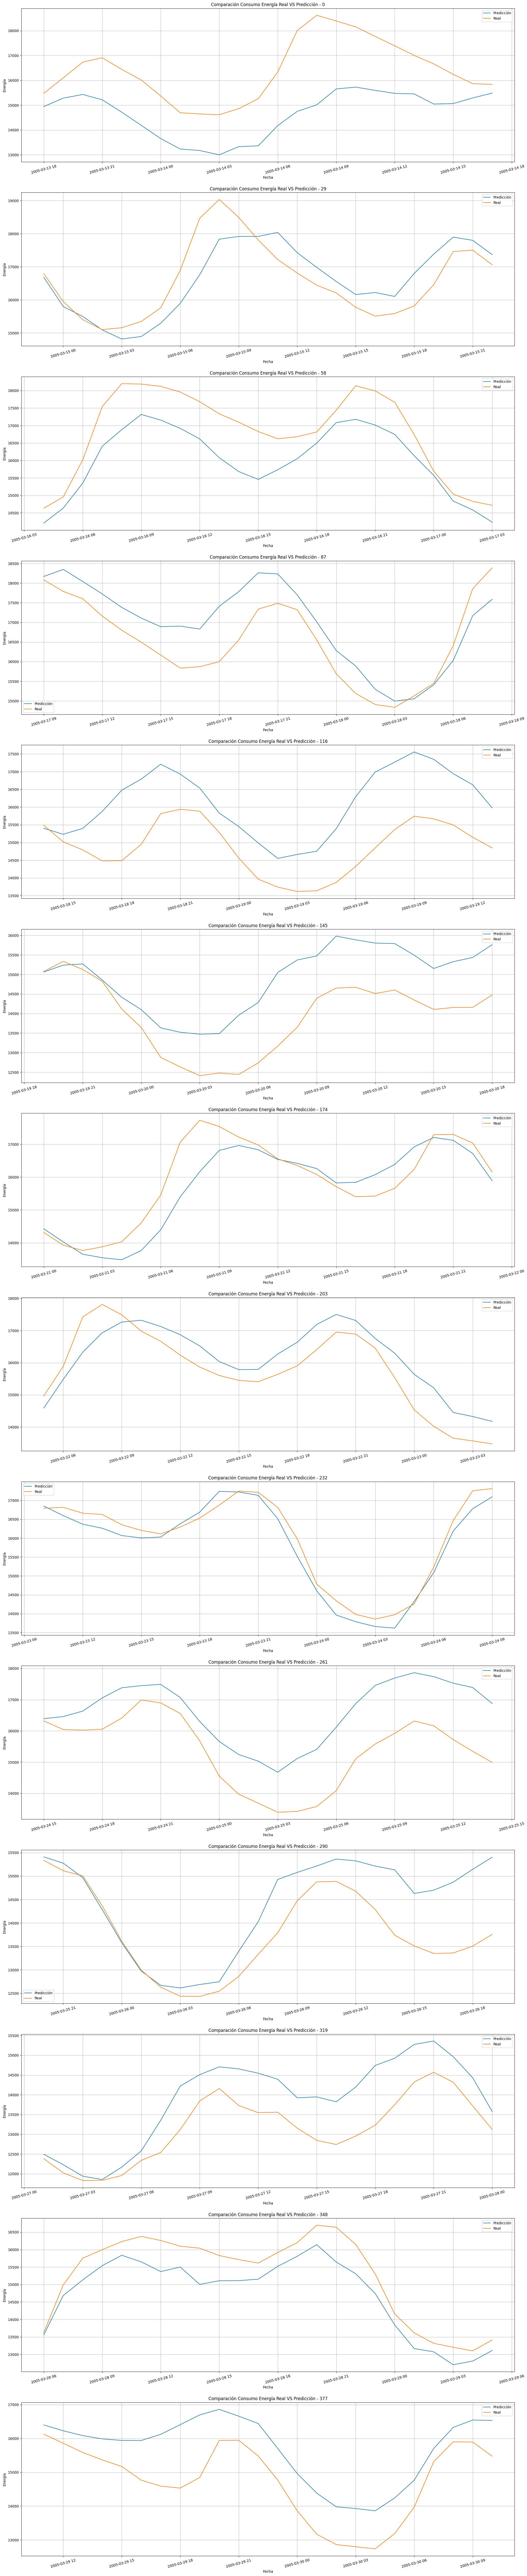

In [16]:
fig = plt.figure(figsize=(25, 130))
ax = fig.subplots(14,1)

for i in range(14):
    ax[i].set_title(f'Comparación Consumo Energía Real VS Predicción - {29*i}')
    ax[i].set_xlabel("Fecha")
    ax[i].set_ylabel("Energía")
    ax[i].plot(fecha_y_test[29*(i)],y_hat[29*(i)],label = "Predicción")
    ax[i].plot(fecha_y_test[29*(i)],estandarizacion.inverse_transform(y_test[29*(i)]),label = "Real")
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H'))
    ax[i].xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=15)
    ax[i].legend()
    ax[i].grid()
    
